In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Попробуем добавить квадратичный член в простую задачу регресии, с одной объясняющей переменной. 

In [15]:
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])[:,np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8])
lr = LinearRegression()
pr = LinearRegression()
# Добаим полиномиальный член второй степени
quadratic = PolynomialFeatures(degree=2)
#degree - степень полинома
X_quad = quadratic.fit_transform(X)

In [17]:
# Выполним подгонку простой линейной регрессионной модели для сравнения
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [18]:
# Выполним подгонку множественной регрессионной модели на трансформированных признаках для полиномиальной регрессии
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

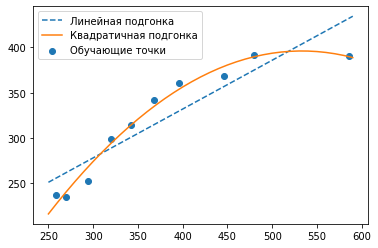

In [20]:
# Построим график
plt.scatter(X,y, label='Обучающие точки')
plt.plot(X_fit, y_lin_fit, label="Линейная подгонка", linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Квадратичная подгонка')
plt.legend(loc='upper left')
plt.show()

На графике видно, что полиномиальная подгонка улавливает связь между переменной ответа и объясняющей переменной гораздо лучше, чем линейная подгонка. 

In [24]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('MSE при обучении линейной модели: %.3f, квадратичной модели: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

MSE при обучении линейной модели: 569.780, квадратичной модели: 61.330


In [26]:
print('R^2 при обучении линейной модели: %.3f, квадратичной модели: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

R^2 при обучении линейной модели: 0.832, квадратичной модели: 0.982


Попробуем на реальном датасете смоделировать связь между признаками с использованием полиномов второго и третьего уровня. 

In [28]:
# DataSet - Housing, содержит информацию о домах в окрестностях Бостона
data = pd.read_csv("https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt",header=None, sep='\s+')
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [30]:
X = data[['LSTAT']].values
y = data[['MEDV']].values

In [32]:
regr = LinearRegression()
#Создадим квадратичные признаки
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [33]:
#Выполним подгонку к признакам
X_fit = np.arange(X.min(), X.max(), 1) [:, np.newaxis]

In [38]:
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

In [39]:
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

In [40]:
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

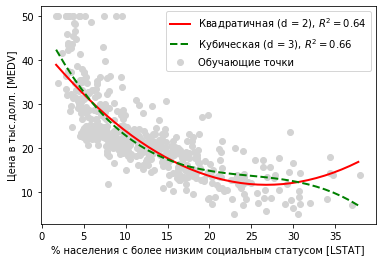

In [45]:
#Выводим результат
plt.scatter(X,y,label='Обучающие точки',color='lightgray')
plt.plot(X_fit, y_quad_fit, label='Квадратичная (d = 2), $R^2=%.2f$' % quadratic_r2,color='red',lw=2,linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='Кубическая (d = 3), $R^2=%.2f$' % cubic_r2,color='green',lw=2,linestyle='--')
plt.xlabel('% населения с более низким социальным статусом [LSTAT]')
plt.ylabel('Цена в тыс.долл. [MEDV]')
plt.legend(loc='upper right')
plt.show()


Как можем заметить кубическая подгонка улавливает связь лучше всего. 